**MNIST Digits Classification using Tensorflow-2.x**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
print(tf.__version__)

2.8.2


In [4]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [6]:
print(X_train[100])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 25

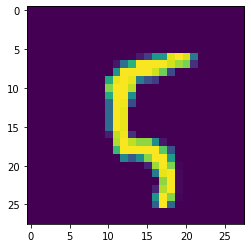

label:  5


In [8]:
plt.imshow(X_train[100])
plt.show()

print("label: ", Y_train[100])

In [9]:
X_train = X_train/255
X_test = X_test/255

In [11]:
print(X_train[100])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
class DNN(tf.keras.Model):
  def __init__(self, sizes):
    super(DNN, self).__init__()
    self.hidden_1 = sizes[0]
    self.hidden_2 = sizes[1]
    self.output_layer_size = sizes[2]

    self.input_layer = tf.keras.layers.Flatten(input_shape=(28,28))
    self.hidden_layer1 = tf.keras.layers.Dense(self.hidden_1, activation='sigmoid')
    self.hidden_layer2 = tf.keras.layers.Dense(self.hidden_2, activation='sigmoid')
    self.output_layer = tf.keras.layers.Dense(self.output_layer_size, activation='softmax')

  def call(self, x_train):  # forward pass
    x = self.input_layer(x_train)
    x = self.hidden_layer1(x)
    x = self.hidden_layer2(x)
    x = self.output_layer(x)
    return x

In [16]:
model = DNN(sizes=[128,64,10])

In [17]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4702 - accuracy: 0.8793
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1794 - accuracy: 0.9476
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1273 - accuracy: 0.9619
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0958 - accuracy: 0.9718
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0748 - accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0589 - accuracy: 0.9824
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0474 - accuracy: 0.9862
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0379 - accuracy: 0.9891
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0309 - accuracy: 0.9912
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.025

In [19]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy: ", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9770
Accuracy:  0.9769999980926514


In [20]:
Y_pred = model.predict(X_test)
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [21]:
print(Y_test)

[7 2 1 ... 4 5 6]


In [22]:
conf_mat = tf.math.confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 971    0    2    1    0    2    2    1    1    0]
 [   0 1120    4    1    0    1    5    1    3    0]
 [   4    1 1009    4    1    0    2    5    6    0]
 [   0    0    4  996    0    0    0    4    2    4]
 [   1    0    1    1  964    0    6    3    0    6]
 [   2    1    0   20    1  859    3    2    1    3]
 [   4    3    2    1    1    7  939    0    1    0]
 [   1    3    8    2    1    0    0 1003    0   10]
 [   4    1    4   11    5    4    4    4  933    4]
 [   3    2    0    8   10    1    0    7    2  976]], shape=(10, 10), dtype=int32)


In [23]:
model.save_weights("/content/drive/MyDrive/mnist/dense_model.h5")

In [24]:
del model

In [25]:
model = DNN(sizes=[128,64,10])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy: ", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 2.4604 - accuracy: 0.1135
Accuracy:  0.11349999904632568


In [27]:
model.load_weights("/content/drive/MyDrive/mnist/dense_model.h5")

In [28]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy: ", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0753 - accuracy: 0.9770
Accuracy:  0.9769999980926514
